> **DO NOT EDIT IF INSIDE `computational_analysis_of_big_data_2018_spring` folder** 

# Week 7: Natural language processing

*Thursday, March 15, 2018*

The exercises today are about extracting high-level knowledge from text. We're still a long way from computers being able to give us insight as deep as that which we can aquire from manually reading text, but some the tools that you will use today get us a long way in understanding useful things about unreadibly large amount of text in comparatively little time. In the exercises today you will:

* Create wordclouds
* Extract sentiment from text
* Construct a Bag of Words (BoW) matrix to represent how words are used about each faction in the Marvel dataset
* Perform a TD-IDF transform to understand which words are important to different character factions

**Questions**: Outside of class, use [issue on GitHub](https://github.com/ulfaslak/computational_analysis_of_big_data_2018_spring/issues) for asking questions.

**Feedback:** Send me anonymous feedback at http://ulfaslak.com/vent.

## Exercises

### Wordcloud

Although they probably offer more buzz than usefulness, wordclouds are a fun way to get quick insight into which words are used in a corpus of text. In this section you will generate one.

>**Ex. 7.1.1**: To make a word cloud you need some more or less clean text. For each character extract as cleanly as you can, the text written on their wikipage. Since the wikidata is kind of messy, there are some things you should be aware of when extracting the text.
* Exclude character names.
* Exclude links.
* Exclude numbers.
* Set everything to lower case.
* Do not include stopwords (use `nltk.corpus.stopwords.words("english")` to get a list of stopwords; install `nltk` to do this).

>Cleaning doesn't have to be perfect and can be done in a many different ways, these are just some things to look out for.

>Once you have extracted the text, create one long text string for all text written about heroes, another long text string for villains, and finally one for ambiguous characters. Using the code snippet below which shows how to plot a word cloud, plot the word clouds for each faction.

>        text = "some cool text"
>        wc = wordcloud.WordCloud(max_font_size=40).generate(text)
>        
>        plt.figure()
>        plt.imshow(wc, interpolation="bilinear")
>        plt.axis("off")
>        plt.show()

> You have to import `matplotlib.pylab` and `wordcloud` to do this. You can install `wordcloud` with anaconda by typing into your console

>        conda install -c https://conda.anaconda.org/amueller wordcloud

>or

>        sudo pip install wordcloud

>if you don't have Anaconda installed.

In [3]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

/usr/local/Cellar/ipython@5/5.5.0_2/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:22: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


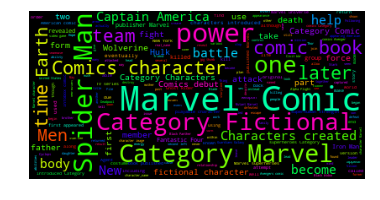

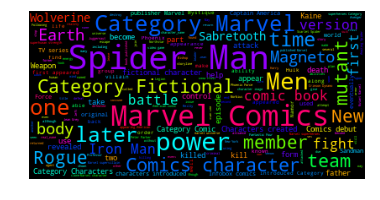

In [ ]:
%matplotlib inline
import wordcloud
import os
from matplotlib import pyplot as plt
import re


for faction in ["heroes", "ambiguous", "villains"]:
    freq = list()
    for filename in os.listdir("../data/%s" % faction):
        F = open("../data/" + faction + "/" + filename) 
        text = F.read()
        text = re.sub(r'[[.*]]', '', text)
        text = re.sub(r'{{.*}}', '', text)
        text = re.sub(r'<.*>', '', text)   
        text = re.sub(r'|.*$', '', text)           
        text = re.sub(r'\*.*$', '', text)   
        text = re.sub(r'==.*==', '', text)
        text = re.sub(r'\'\'\'.*\'\'\'', '', text)
        text = text.split(' ')
        for word in text:
            if word not in stop and word != "Marvel" and word != "Comics": freq.append(word)
        F.close()
    wc = wordcloud.WordCloud(max_font_size=40).generate(" ".join(freq))
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()



### Sentiment analysis

Often you don't have time to read some text, but you need to know something about whether it positively or negatively toned. Enter *Sentiment Analysis*. The point of this exercise is to extract the sentiment of text on your heroes, villains and ambiguous characters and figure out whether Wikipedia is biased towards writing in a certain tone towards a certain kind of characters.

>**Ex. 7.2.1**: For each of the three character classes, compute the sentiment scores across wikipedia articles so that you can produce three histograms (one for each class) with sentiment scores. You can use the text strings you generated in the previous exercise. We will cheat a bit and use a library that does the scoring for us. Install `afinn` using `conda` or `pip` and extract the sentiment with that module. There's an example of how to use it on the library's [PyPi repository](https://pypi.python.org/pypi/afinn).

### Bag of Words matrix

Intuitively, "Bag of Words" means breaking up a document into words and throwing them into a bag. And that's very close to the truth! In week 5 you constructed a "team-affiliations" matrix which had a row for each character and a column for each team. If the character was on a given team there would be a one for that character row at that team column, if not there would be a zero. The BoW is the same, only now, rather than teams, your columns are individual words that a character's wikipage might contain, and the numbers represent how many times those words appear.
<img src="http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_bow.png" width="400"/>
BoW's are pretty large and sparse (mostly contain zero's) matrices, but they are extremely useful because they allow us to use linear algebra to do things like PCA, classification, etc..

>**Ex. 7.3.1**: If we were interested in learning about differences on the character level we would build a BoW matrix like the one in the image above. However, as you may have sensed, we care mostly about differences across the factions (heroes, villains, ambiguous). In this exercise, you will therefore construct a Bag of Words matrix that has three rows: one for each faction. There are functions that do this for you in `sklearn`, but today you will do it yourself. After you have done this, what is the shape of your matrix? I got `(3, 13087)`, but depending on how you process your data, you can get different results, which is all good. Also print the total sum of numbers inside this matrix, just so it's easier to check if you got within a reasonable range of correctness (remember that correctness is not binary anymore).

>*Hints:*
* *Since you already extracted lists of words for each faction in Ex. 7.1.1, you can use these to figure out what the total vocabulary of words used in your dataset is. You can "clean up" this vocabulary by a number of tricks. For example, there are tools for *stemming* words to remove grammar so that e.g. 'cat' and 'cats' both become 'cat', but that's all up to you whether you wanna go that deep.*
* *You should also figure out which column should represent what word. To do this, you can create a single list with all words used for all characters, and take the `set` of it, so you obtain the vocabulary of your corpus. Then you can create a dictionary that maps from word to column index.*
* *Now you should be able to loop over each faction's list of words and create vectors that represent how many times each vocabulary word was used within a given faction's wikipedia pages. Your final BoW matrix should be a `numpy` array which has shape `(3, vocabulary_size)`.*

### TF-IDF

You didn't just make that BoW matrix for fun. We are interested in knowing how (or if) words are used differently across factions, and the best way to do that is to used something called a Term Frequency - Inverse Document Frequency (TF-IDF) transformation. You can read about it [on Wikipedia](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), but the gist is that it reflects how important each word is to each document (a document in this case being a faction).

It works in two steps:
* (1 - TF) you normalize over the frequency of each word in each document, so that rows sum to 1. Every row is now a probability distribution (a pmf to be exact) that gives the "term frequency" in each document.
* (2 - IDF) you weigh the TF by the inverse document frequency, which measures how unique a word to specific documents. For example, the word "the" will be frequently used in every document (high TF) but we know it's not very special because it's used in all documents so the inverse document frequency is low, yielding a vanishing TF-IDF score for "the" in all documents.

>**Ex. 7.4.1**: Use any tool you like (you can do it manually, it's not impossible), to perform a TF-IDF transform on your BoW matrix from Ex. 7.3.1. The result should be a matrix of the same shape as the BoW, but with different values inside.
1. What do these values reflect?
2. Report the top 10 words for each faction.
3. Comment on the results. From what you learned when you plotted the word cloud, is this the expected result?